### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

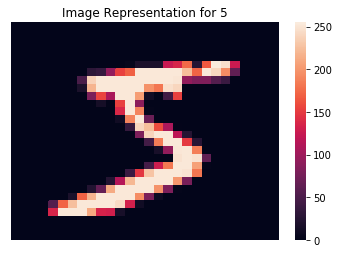

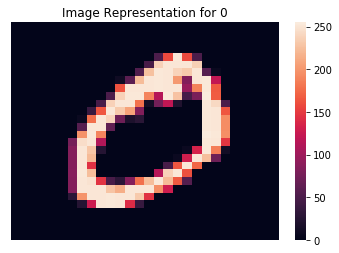

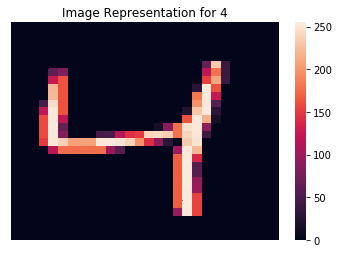

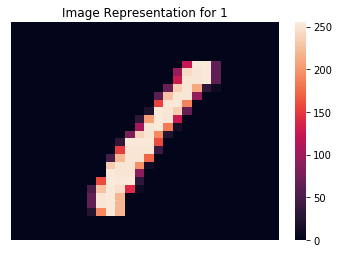

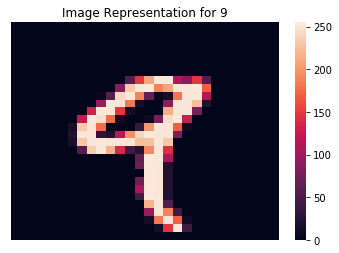

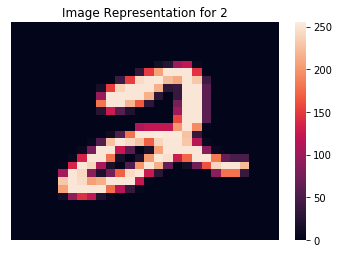

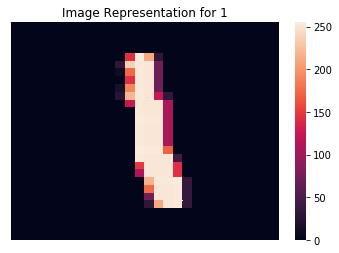

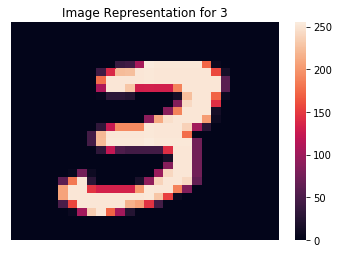

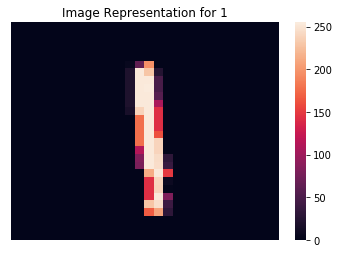

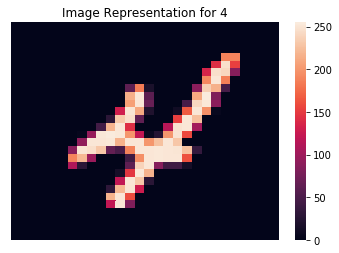

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Decision Tree

In [14]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:30000]
y_train = y_shuffle[0:30000]

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict


dt_clf = tree.DecisionTreeClassifier()

y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Calculate Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.83936425,  0.83151685,  0.84042021])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [17]:
y_train_pred

array([1, 4, 2, ..., 7, 5, 0], dtype=uint8)

In [18]:
y_train

array([1, 4, 2, ..., 7, 5, 0], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [19]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [20]:
confusionMatrix

array([[2630,    4,   47,   33,   31,   61,   68,   12,   50,   24],
       [   4, 3131,   29,   23,   16,   27,   14,   15,   34,   11],
       [  32,   67, 2438,   93,   59,   50,   81,   68,   96,   42],
       [  28,   41,   95, 2467,   30,  166,   28,   44,  117,   85],
       [  18,   16,   39,   23, 2517,   36,   69,   40,   60,  175],
       [  71,   34,   39,  155,   54, 2048,   83,   19,  103,   90],
       [  64,   13,   72,   24,   80,   89, 2527,   11,   73,   15],
       [  17,   35,   73,   53,   43,   24,    7, 2679,   34,  113],
       [  54,   50,   95,  124,   75,   98,   73,   34, 2181,  110],
       [  26,   18,   38,   89,  149,   89,   16,   99,   69, 2387]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

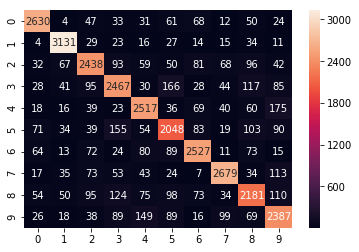

In [21]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [22]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [23]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

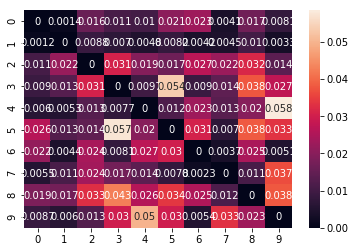

In [24]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [25]:
y_test_pred = dt_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 902,    1,   15,    6,    5,   12,   19,    4,    9,    7],
       [   0, 1087,    6,   11,    4,    5,    2,    6,   13,    1],
       [  10,   17,  868,   29,   23,    7,   20,   31,   21,    6],
       [  14,    6,   25,  838,    6,   56,    5,    7,   32,   21],
       [   7,    5,   12,   12,  835,    8,   14,   13,   15,   61],
       [  25,    9,   13,   70,   13,  665,   23,    8,   34,   32],
       [  23,    5,   18,    6,   20,   28,  828,    7,   14,    9],
       [   0,   13,   27,   13,   10,    5,    1,  907,   11,   41],
       [  14,    5,   35,   32,   17,   38,   29,    8,  760,   36],
       [  10,    6,   16,   22,   50,   13,    2,   29,   26,  835]], dtype=int64)

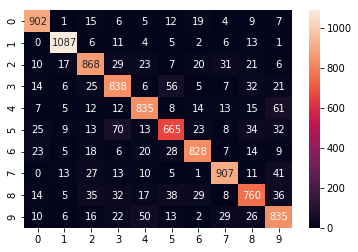

In [27]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [28]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

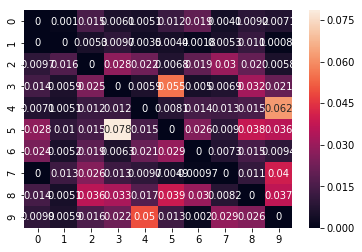

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.85250000000000004